### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

# Новый раздел

In [55]:
# -- ВАШ КОД ТУТ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
#generate
def generate_degree( data: list, degree: int):
    return np.array([data**i for i in range(1, degree+1)]).T

#setting
df = pd.read_csv('../3.10_non_linear.csv')
alpha = 0.8
degree = 8
syntetic = generate_degree(df['x_train'], degree)
x_train, x_test, y_train, y_test = train_test_split(syntetic, df['y_train'], test_size = 0.2, random_state = 10)

print('x_train is: ', x_test.shape)

#train
model_las = Lasso(alpha = alpha).fit(x_train,y_train) 
model_ri = Ridge(alpha = alpha).fit(x_train,y_train)

#predict
las_predict = model_las.predict(x_test)
ri_predict = model_ri.predict(x_test)

#loss
print(mean_squared_error(y_test, las_predict))
print(mean_squared_error(y_test, ri_predict))

x_train is:  (10, 8)
0.09284713448746991
0.07852416459969694


C:\Users\79227\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7134369621139607, tolerance: 0.0024481555784964045
  model = cd_fast.enet_coordinate_descent(


In [56]:
model_las.coef_

array([-0.00000000e+00, -0.00000000e+00, -1.08299601e-02, -9.52247249e-03,
        1.03490179e-03,  1.87872250e-04,  3.38785318e-06, -2.14838285e-06])

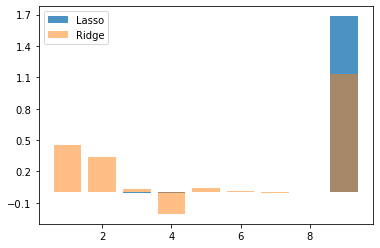

In [70]:
plt.bar([i for i in range(1,10)],\
        np.array(model_las.coef_.tolist() + [model_las.intercept_.tolist()]),\
        label = 'Lasso', alpha = 0.8)
plt.bar([i for i in range(1,10)],\
        np.array(model_ri.coef_.tolist() + [model_ri.intercept_.tolist()]),\
        label = 'Ridge', alpha = 0.5)
plt.yticks([i/10 for i in range(-1,20, 3)])
plt.legend()
plt.show()

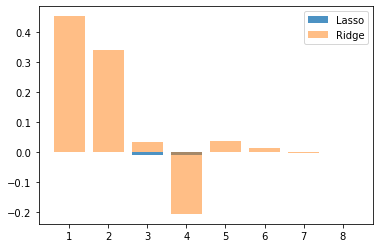

In [68]:
plt.bar([i for i in range(1,9)],\
        np.array(model_las.coef_.tolist()),\
        label = 'Lasso', alpha = 0.8)
plt.bar([i for i in range(1,9)],\
        np.array(model_ri.coef_.tolist()),\
        label = 'Ridge', alpha = 0.5)
plt.legend()
plt.show()

Вывод: веса ridge регрессии имею больший разброс, а отличие от lasso

#### Риндж обучилась хуже Лассо

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!